<a href="https://colab.research.google.com/github/bhuvangambhir/Heart_Disease_Prediction_Model/blob/main/Heart_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

In [ ]:
st = StandardScaler()
le = LabelEncoder()

In [ ]:
df = pd.read_csv('/content/heart (1).csv')

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


<Axes: xlabel='Age', ylabel='Count'>

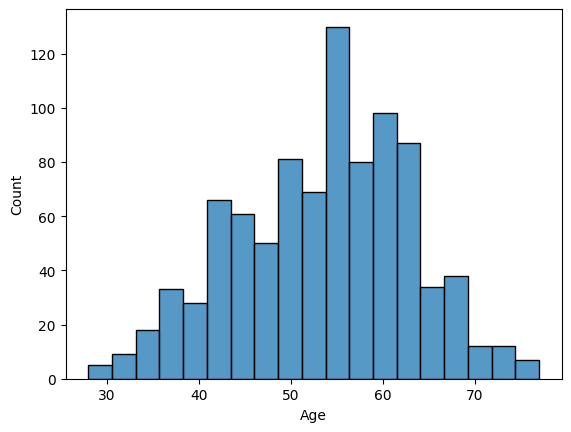

In [ ]:
sns.histplot(df['Age'])

<Axes: xlabel='Cholesterol', ylabel='Count'>

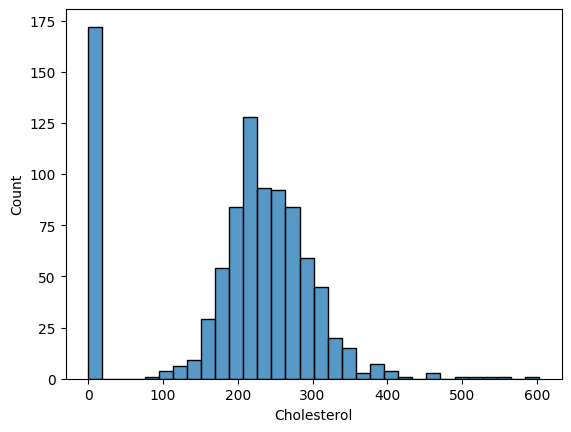

In [ ]:
sns.histplot(df['Cholesterol'])

In [ ]:
df['Cholesterol'] = df['Cholesterol'].replace(0, df['Cholesterol'].mean())

<Axes: xlabel='Cholesterol', ylabel='Count'>

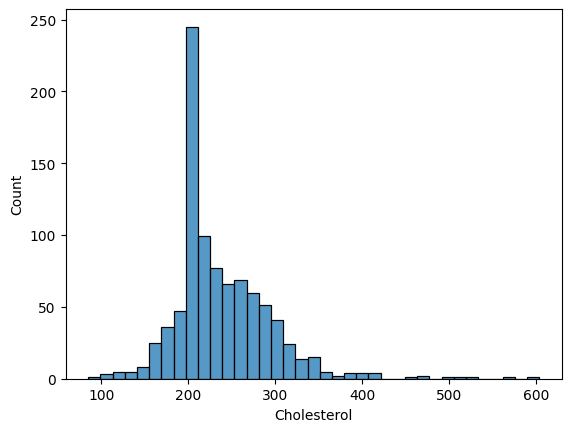

In [ ]:
sns.histplot(df['Cholesterol'])

<Axes: xlabel='count', ylabel='Sex'>

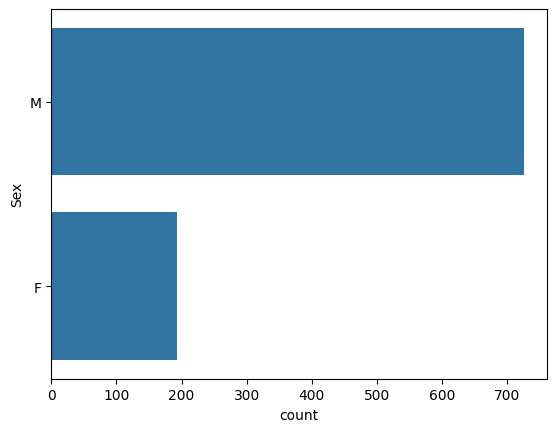

In [ ]:
sns.countplot(df['Sex'])

<Axes: xlabel='FastingBS', ylabel='Count'>

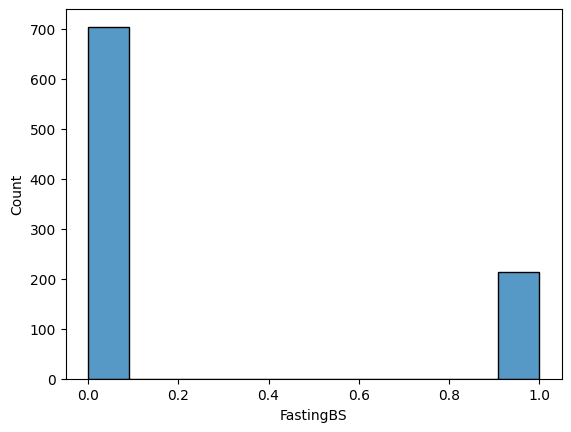

In [ ]:
sns.histplot(df['FastingBS'])

<Axes: >

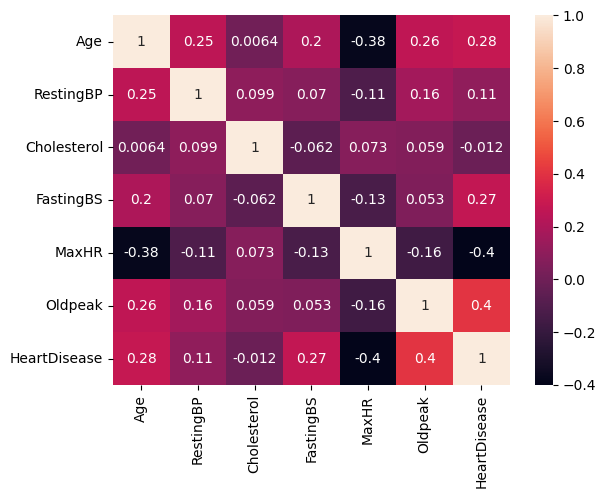

In [ ]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import r2_score
li = LinearRegression()
lo = LogisticRegression()
knn = KNeighborsClassifier(n_neighbors=5)
nb = GaussianNB()
dt = DecisionTreeClassifier(max_depth= 5, min_samples_split=39)
svm = SVC()

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289.0,0,1,172,0,0.0,2,0
1,49,0,2,160,180.0,0,1,156,0,1.0,1,1
2,37,1,1,130,283.0,0,2,98,0,0.0,2,0
3,48,0,0,138,214.0,0,1,108,1,1.5,1,1
4,54,1,2,150,195.0,0,1,122,0,0.0,2,0


In [ ]:
cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
for col in cols:
  df[col] = le.fit_transform(df[col])

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289.0,0,1,172,0,0.0,2,0
1,49,0,2,160,180.0,0,1,156,0,1.0,1,1
2,37,1,1,130,283.0,0,2,98,0,0.0,2,0
3,48,0,0,138,214.0,0,1,108,1,1.5,1,1
4,54,1,2,150,195.0,0,1,122,0,0.0,2,0


In [ ]:
x = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [ ]:
x_scaled = st.fit_transform(x)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [ ]:
li.fit(x_train, y_train)

LinearRegression()

In [ ]:
y_pred_li = li.predict(x_test)

In [ ]:
r2 = r2_score(y_test, y_pred_li)
r2

0.43285948925158413

In [ ]:
adjusted_r2 = 1 - (1-r2)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)
adjusted_r2

0.3965888751920924

In [ ]:
lo.fit(x_train, y_train)

LogisticRegression()

In [ ]:
y_pred_lo = lo.predict(x_test)

In [ ]:
acc_lo = accuracy_score(y_test, y_pred_lo)

In [ ]:
acc_lo

0.8369565217391305

In [ ]:
confusion_matrix(y_test, y_pred_lo)

array([[68,  9],
       [21, 86]])

In [ ]:
print(classification_report(y_test, y_pred_lo))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82        77
           1       0.91      0.80      0.85       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



In [ ]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred_knn = knn.predict(x_test)

In [ ]:
acc_knn = accuracy_score(y_test, y_pred_knn)

In [ ]:
acc_knn

0.8369565217391305

In [ ]:
confusion_matrix(y_test, y_pred_knn)

array([[67, 10],
       [20, 87]])

In [ ]:
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        77
           1       0.90      0.81      0.85       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [ ]:
nb.fit(x_train, y_train)

GaussianNB()

In [ ]:
y_pred_nb = nb.predict(x_test)

In [ ]:
acc_nb = accuracy_score(y_test, y_pred_nb)

In [ ]:
acc_nb

0.7934782608695652

In [ ]:
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           0       0.71      0.84      0.77        77
           1       0.87      0.76      0.81       107

    accuracy                           0.79       184
   macro avg       0.79      0.80      0.79       184
weighted avg       0.81      0.79      0.79       184



In [ ]:
dt.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=39)

In [ ]:
y_pred_dt = dt.predict(x_test)

In [ ]:
acc_dt = accuracy_score(y_test, y_pred_dt)

In [ ]:
acc_dt

0.8369565217391305

In [ ]:
confusion_matrix(y_test, y_pred_dt)

array([[67, 10],
       [20, 87]])

In [ ]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82        77
           1       0.90      0.81      0.85       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [ ]:
svm.fit(x_train, y_train)

SVC()

In [ ]:
y_pred_svm = svm.predict(x_test)

In [ ]:
acc_svm = accuracy_score(y_test, y_pred_svm)

In [ ]:
acc_svm

0.842391304347826

In [ ]:
confusion_matrix(y_test, y_pred_svm)

array([[65, 12],
       [17, 90]])

In [ ]:
print(classification_report(y_test, y_pred_svm))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        77
           1       0.88      0.84      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
cv = cross_val_score(lo, x, y, cv=5)

In [ ]:
print(cv.mean())

0.8202185792349728


In [ ]:
param_grid = {
    'C': np.arange(1,30)}
gs = GridSearchCV(svm, param_grid, cv = 5 )

In [ ]:
gs.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [ ]:
y_pred_gs = gs.predict(x_test)

In [ ]:
acc_gs = accuracy_score(y_test, y_pred_gs)
acc_gs

0.842391304347826

In [ ]:
confusion_matrix(y_test, y_pred_gs)

array([[65, 12],
       [17, 90]])

In [ ]:
print(classification_report(y_test, y_pred_gs))

              precision    recall  f1-score   support

           0       0.79      0.84      0.82        77
           1       0.88      0.84      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.84      0.84       184
weighted avg       0.84      0.84      0.84       184



In [ ]:
rs = RandomizedSearchCV(svm, param_grid, cv = 5)

In [ ]:
rs.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])})

In [ ]:
y_pred_rs = rs.predict(x_test)

In [ ]:
acc_rs = accuracy_score(y_test, y_pred_rs)
acc_rs

0.842391304347826

In [ ]:
param_grid1 = {
    'n_estimators': [10,20,30,40,50,60,70,80,90,100],
    'max_depth': [1,2,3,4,5,6,7,8,9,10]}

In [ ]:
rs1 = RandomizedSearchCV(RandomForestClassifier(),param_distributions=param_grid1, cv=5)

In [ ]:
rs1.fit(x_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10],
                                        'n_estimators': [10, 20, 30, 40, 50, 60,
                                                         70, 80, 90, 100]})

In [ ]:
y_pred_rs1 = rs1.predict(x_test)

In [ ]:
acc_rs1 = accuracy_score(y_test, y_pred_rs1)
acc_rs1

0.875

In [ ]:
confusion_matrix(y_test, y_pred_rs1)

array([[68,  9],
       [14, 93]])

In [ ]:
print(classification_report(y_test, y_pred_rs1))

              precision    recall  f1-score   support

           0       0.83      0.88      0.86        77
           1       0.91      0.87      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.88      0.87       184
weighted avg       0.88      0.88      0.88       184



In [ ]:
rfc = RandomForestClassifier(n_estimators=40, min_samples_split=6, min_samples_leaf=1, max_depth=9)

In [ ]:
rfc.fit(x_train, y_train)

RandomForestClassifier(max_depth=9, min_samples_split=6, n_estimators=40)

In [ ]:
y_pred_rfc = rfc.predict(x_test)

In [ ]:
acc_rfc = accuracy_score(y_test, y_pred_rfc)
acc_rfc

0.8804347826086957

In [ ]:
confusion_matrix(y_test, y_pred_rfc)

array([[68,  9],
       [13, 94]])

In [ ]:
print(classification_report(y_test, y_pred_rfc))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        77
           1       0.91      0.88      0.90       107

    accuracy                           0.88       184
   macro avg       0.88      0.88      0.88       184
weighted avg       0.88      0.88      0.88       184



In [ ]:
base_learner = {'svm': svm, 'rfc': rfc, 'knn': knn,'dt': dt}

In [ ]:
meta_learner = LogisticRegression()

In [ ]:
stc = StackingClassifier(estimators=list(base_learner.items()), final_estimator=meta_learner, cv= 5)

In [ ]:
stc.fit(x_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('svm', SVC()),
                               ('rfc',
                                RandomForestClassifier(max_depth=9,
                                                       min_samples_split=6,
                                                       n_estimators=40)),
                               ('knn', KNeighborsClassifier()),
                               ('dt',
                                DecisionTreeClassifier(max_depth=5,
                                                       min_samples_split=39))],
                   final_estimator=LogisticRegression())

In [ ]:
y_pred_stc = stc.predict(x_test)

In [ ]:
acc_stc = accuracy_score(y_test, y_pred_stc)
acc_stc

0.8586956521739131

In [ ]:
confusion_matrix(y_test, y_pred_stc)

array([[67, 10],
       [16, 91]])

In [ ]:
print(classification_report(y_test, y_pred_stc))

              precision    recall  f1-score   support

           0       0.81      0.87      0.84        77
           1       0.90      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
ad = AdaBoostClassifier(rfc, n_estimators=50, learning_rate=0.9)
gb = GradientBoostingClassifier(loss= 'log_loss', learning_rate=0.5, n_estimators=200, min_samples_split=4, max_depth=9)
xg = XGBClassifier()

In [ ]:
ad.fit(x_train, y_train)

AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=9,
                                                    min_samples_split=6,
                                                    n_estimators=40),
                   learning_rate=0.9)

In [ ]:
y_pred_ad = ad.predict(x_test)

In [ ]:
acc_ad = accuracy_score(y_test, y_pred_ad)
acc_ad

0.875

In [ ]:
confusion_matrix(y_test, y_pred_ad)

array([[67, 10],
       [13, 94]])

In [ ]:
print(classification_report(y_test, y_pred_ad))

              precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



In [ ]:
gb.fit(x_train, y_train)

GradientBoostingClassifier(learning_rate=0.5, max_depth=9, min_samples_split=4,
                           n_estimators=200)

In [ ]:
y_pred_gb = gb.predict(x_test)

In [ ]:
acc_gb = accuracy_score(y_test, y_pred_gb)
acc_gb

0.8369565217391305

In [ ]:
confusion_matrix(y_test, y_pred_gb)

array([[68,  9],
       [21, 86]])

In [ ]:
print(classification_report(y_test, y_pred_gb))

              precision    recall  f1-score   support

           0       0.76      0.88      0.82        77
           1       0.91      0.80      0.85       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



In [ ]:
xg.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
y_pred_xg = xg.predict(x_test)

In [ ]:
acc_xg = accuracy_score(y_test, y_pred_xg)
acc_xg

0.842391304347826

In [ ]:
confusion_matrix(y_test, y_pred_xg)

array([[67, 10],
       [19, 88]])

In [ ]:
print(classification_report(y_test, y_pred_xg))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82        77
           1       0.90      0.82      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184



In [ ]:
import joblib
joblib.dump(rfc, 'rfc_heart.pkl')
joblib.dump(st, 'st.pkl')
joblib.dump(x.columns.tolist(), 'columns.pkl')

['columns.pkl']